# Réduction de la taille du fichier contenant les jobs des personnes (crew)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Il n'est pas possible de charger le fichier d'origine dans un dataframe car il est trop lourd.

Solution : Construction du fichier avec les jobs du crew (titre_du_film, personne, job) :
  * on enlève les lignes qui n'ont pas de valeurs pour les 4 premiers attributs (=les attributs dont on a besoin)
  * on écrit les données triées dans un nouveau fichier .csv

Edit : Finalement, après le traitement, toutes les lignes ont été conservées (le seul changement est le fait qu'il n'y a plus que les 4 premières colonnes)

In [ ]:
# 60 760 207 lignes avant traitement

nb_ecriture = 0

with open('/content/drive/MyDrive/M1/S2/DALAS/Projet/data-5.tsv', 'r') as f:
  lines = f.readlines()
  with open('/content/drive/MyDrive/M1/S2/DALAS/Projet/data_job.tsv', 'w') as fw:
    line = lines[0].split("\t")[:4]
    fw.write("\t".join(line) + '\n')

  nb_tuple = 0
  tuples_a_ecrire = ""
  for line in lines[1:]:
    line = line.split("\t")[:4]
    if not '\\N' in line:
      nb_tuple += 1
      tuples_a_ecrire += "\t".join(line) + '\n'
    if nb_tuple == 1000:
      with open('/content/drive/MyDrive/M1/S2/DALAS/Projet/data_job.tsv', 'a') as fw:
        fw.write(tuples_a_ecrire)
        nb_ecriture += 1
        print(nb_ecriture, "écritures de 1000 tuples")
        nb_tuple = 0
        tuples_a_ecrire = ""
  if nb_tuple < 1000:
    with open('/content/drive/MyDrive/M1/S2/DALAS/Projet/data_job.tsv', 'a') as fw:
        fw.write(tuples_a_ecrire)
        print(f"+ écritures des {nb_tuple} derniers tuples")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
55762 écritures de 1000 tuples
55763 écritures de 1000 tuples
55764 écritures de 1000 tuples
55765 écritures de 1000 tuples
55766 écritures de 1000 tuples
55767 écritures de 1000 tuples
55768 écritures de 1000 tuples
55769 écritures de 1000 tuples
55770 écritures de 1000 tuples
55771 écritures de 1000 tuples
55772 écritures de 1000 tuples
55773 écritures de 1000 tuples
55774 écritures de 1000 tuples
55775 écritures de 1000 tuples
55776 écritures de 1000 tuples
55777 écritures de 1000 tuples
55778 écritures de 1000 tuples
55779 écritures de 1000 tuples
55780 écritures de 1000 tuples
55781 écritures de 1000 tuples
55782 écritures de 1000 tuples
55783 écritures de 1000 tuples
55784 écritures de 1000 tuples
55785 écritures de 1000 tuples
55786 écritures de 1000 tuples
55787 écritures de 1000 tuples
55788 écritures de 1000 tuples
55789 écritures de 1000 tuples
55790 écritures de 1000 tuples
55791 écritures de 1000

# Traitement du dataframe des jobs

In [1]:
import pandas as pd

In [2]:
data_file = pd.read_csv('/content/drive/MyDrive/M1/S2/DALAS/Projet/data_job.tsv', sep='\t')

In [3]:
data_file

,tconst,ordering,nconst,category
0,tt0000001,1,nm1588970,self
1,tt0000001,2,nm0005690,director
2,tt0000001,3,nm0374658,cinematographer
3,tt0000002,1,nm0721526,director
4,tt0000002,2,nm1335271,composer
...,...,...,...,...
60760201,tt9916880,5,nm0584014,director
60760202,tt9916880,6,nm0996406,director
60760203,tt9916880,7,nm1482639,writer
60760204,tt9916880,8,nm2586970,writer


In [4]:
data_file["category"].unique()

array(['self', 'director', 'cinematographer', 'composer', 'producer',
       'editor', 'actor', 'actress', 'writer', 'production_designer',
       'archive_footage', 'archive_sound'], dtype=object)

In [5]:
data_file["category"] = data_file["category"].astype('category')

In [6]:
type(data_file["category"])

pandas.core.series.Series

## Category_code = code pour un job (transformation d'un label en une valeur)

In [7]:
data_file['category_code'] = data_file["category"].cat.codes
data_file

,tconst,ordering,nconst,category,category_code
0,tt0000001,1,nm1588970,self,10
1,tt0000001,2,nm0005690,director,6
2,tt0000001,3,nm0374658,cinematographer,4
3,tt0000002,1,nm0721526,director,6
4,tt0000002,2,nm1335271,composer,5
...,...,...,...,...,...
60760201,tt9916880,5,nm0584014,director,6
60760202,tt9916880,6,nm0996406,director,6
60760203,tt9916880,7,nm1482639,writer,11
60760204,tt9916880,8,nm2586970,writer,11


## Id_pers = identifiant d'une personne (sans le préfixe "nm" de nconst)

In [12]:
def without_nm_prefix(x):
  # x est une valeur de la colonne nconst --> x = 'nmXXXXXXXXX'
  # id de x = XXXXXXXXXX
  return int(x[2:])

In [13]:
data_file["id_pers"] = data_file["nconst"].apply(without_nm_prefix)

# Fusion des 2 dataframes (job et box-office)

In [15]:
scrapped_file = pd.read_csv('/content/drive/MyDrive/M1/S2/DALAS/Projet/scrapped_en.tsv', sep='\t')

In [16]:
scrapped_file = scrapped_file.rename(columns={'Tconst du film': 'tconst'})
scrapped_file

,Unnamed: 0,tconst,Titre du film,Jour de sortie,Mois de sortie,Année de sortie,Durée,Pays,Langage,Budget min,Budget max,Box office min,Box office max
0,0,tt0000001,Carmencita,\N,\N,1894,\N,United States,Silent,\N,\N,\N,\N
1,1,tt0000003,Pauvre Pierrot,28,10,1892,15,France,Silent,\N,\N,\N,\N
2,2,tt0000004,Un bon bock,28,10,1892,15,France,Silent,\N,\N,\N,\N
3,3,tt0000005,Blacksmith Scene,09,05,1893,\N,United States,Silent,\N,\N,\N,\N
4,4,tt0000006,Chinese Opium Den,\N,\N,1894,\N,United States,Silent,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29468,29082,tt0063816,Windy Day,\N,\N,\N,\N,\N,Korean,\N,\N,\N,\N
29469,29083,tt0063818,The Valley of Death,12,12,1968,89,West GermanyItalyYugoslavia,German,\N,\N,\N,\N
29470,29084,tt0063819,Winnie the Pooh and the Blustery Day,20,12,1968,25,United States,English,\N,\N,\N,\N
29471,29085,tt0063822,Admiral Yamamoto,14,08,1968,130,Japan,Japanese,\N,300000000.0,\N,400000000.0


In [17]:
real_file = data_file.merge(scrapped_file, how="inner", on="tconst")
real_file

,tconst,ordering,nconst,category,category_code,id_pers,Unnamed: 0,Titre du film,Jour de sortie,Mois de sortie,Année de sortie,Durée,Pays,Langage,Budget min,Budget max,Box office min,Box office max
0,tt0000001,1,nm1588970,self,10,1588970,0,Carmencita,\N,\N,1894,\N,United States,Silent,\N,\N,\N,\N
1,tt0000001,2,nm0005690,director,6,5690,0,Carmencita,\N,\N,1894,\N,United States,Silent,\N,\N,\N,\N
2,tt0000001,3,nm0374658,cinematographer,4,374658,0,Carmencita,\N,\N,1894,\N,United States,Silent,\N,\N,\N,\N
3,tt0000003,1,nm0721526,director,6,721526,1,Pauvre Pierrot,28,10,1892,15,France,Silent,\N,\N,\N,\N
4,tt0000003,2,nm1770680,producer,8,1770680,1,Pauvre Pierrot,28,10,1892,15,France,Silent,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271285,tt0063823,5,nm0242945,director,6,242945,29086,Yellow Submarine,17,07,1968,89,United KingdomUnited States,English,\N,250000.0,\N,\N
271286,tt0063823,6,nm0591543,writer,11,591543,29086,Yellow Submarine,17,07,1968,89,United KingdomUnited States,English,\N,250000.0,\N,\N
271287,tt0063823,7,nm0110771,writer,11,110771,29086,Yellow Submarine,17,07,1968,89,United KingdomUnited States,English,\N,250000.0,\N,\N
271288,tt0063823,8,nm0578859,writer,11,578859,29086,Yellow Submarine,17,07,1968,89,United KingdomUnited States,English,\N,250000.0,\N,\N


In [18]:
real_file.columns

Index(['tconst', 'ordering', 'nconst', 'category', 'category_code', 'id_pers',
       'Unnamed: 0', 'Titre du film', 'Jour de sortie', 'Mois de sortie',
       'Année de sortie', 'Durée', 'Pays', 'Langage', 'Budget min',
       'Budget max', 'Box office min', 'Box office max'],
      dtype='object')

## Enlève certaines colonnes pour que le dataframe soit moins lourd

In [19]:
real_file = real_file.drop(['ordering', 'Unnamed: 0', 'Titre du film', 'Jour de sortie', 'Mois de sortie',
                            'Année de sortie', 'Durée', 'Pays', 'Langage'], axis=1)

## Enlève les lignes où le box-office n'est pas connu (pour que le dataframe soit moins lourd)

In [21]:
def index_line_without_value(series): # Renvoie les index des lignes où il y a \\N pour valeur
  return series[series == "\\N"]

In [31]:
index_line_without_value(real_file["Box office max"]).index

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       271280, 271281, 271282, 271283, 271284, 271285, 271286, 271287, 271288,
       271289],
      dtype='int64', length=236559)

In [32]:
real_file = real_file.drop(index=index_line_without_value(real_file["Box office max"]).index)

In [33]:
real_file

,tconst,nconst,category,category_code,id_pers,Budget min,Budget max,Box office min,Box office max
108,tt0000091,nm0194945,actress,1,194945,\N,900000.0,\N,101215.0
109,tt0000091,nm6170115,actor,0,6170115,\N,900000.0,\N,101215.0
110,tt0000091,nm0617588,actor,0,617588,\N,900000.0,\N,101215.0
444,tt0000574,nm0675239,cinematographer,4,675239,\N,4001000.0,\N,25000.0
445,tt0000574,nm0846887,actress,1,846887,\N,4001000.0,\N,25000.0
...,...,...,...,...,...,...,...,...,...
271275,tt0063822,nm0555476,director,6,555476,\N,300000000.0,\N,400000000.0
271276,tt0063822,nm0368074,writer,11,368074,\N,300000000.0,\N,400000000.0
271277,tt0063822,nm0839783,writer,11,839783,\N,300000000.0,\N,400000000.0
271278,tt0063822,nm0766496,composer,5,766496,\N,300000000.0,\N,400000000.0


# Corrélation entre les personnes (d'une certaine profession) et le box-office

--> On n'arrive à rien interpréter ???

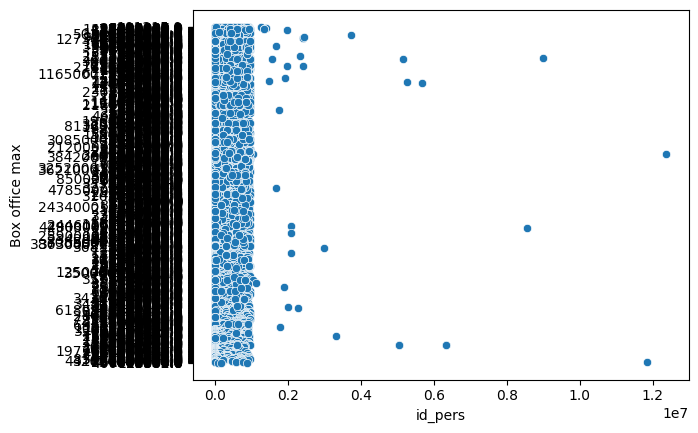

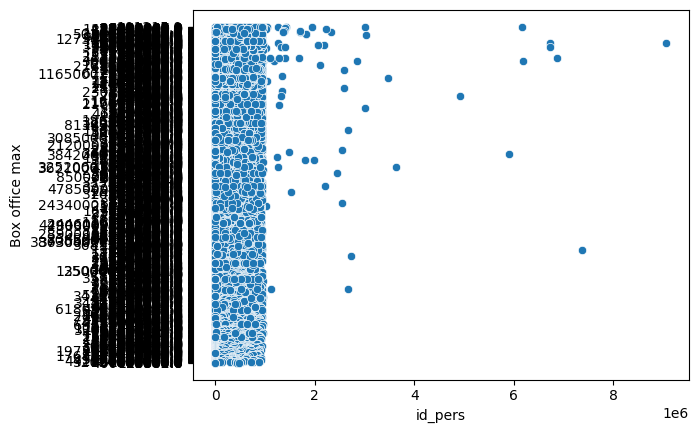

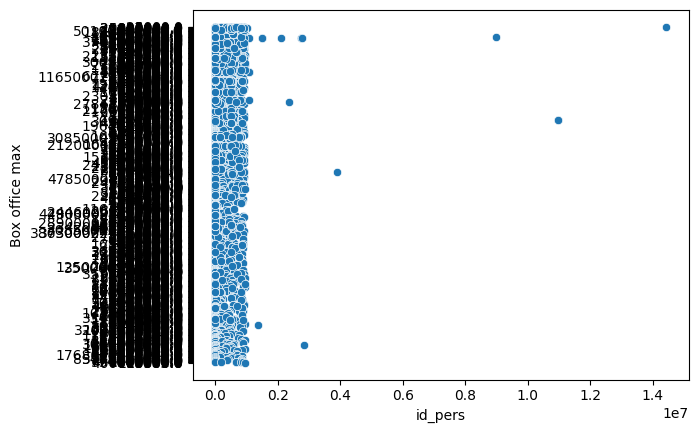

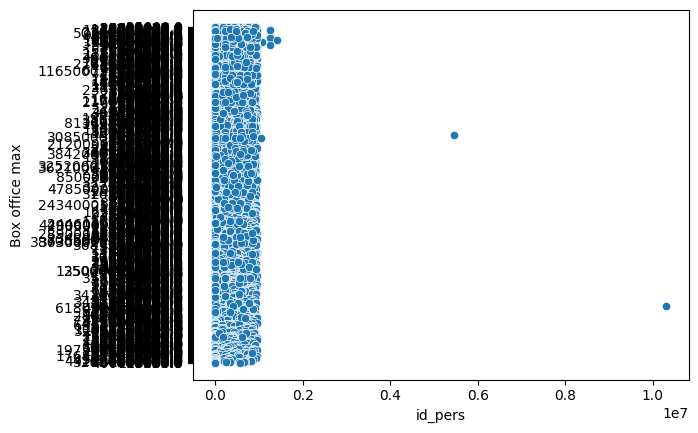

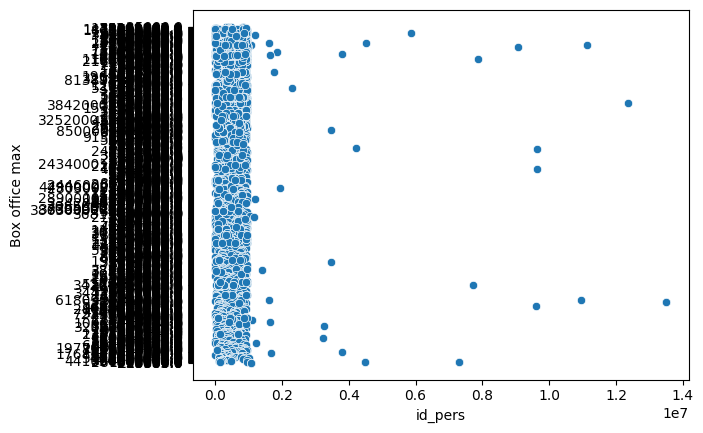

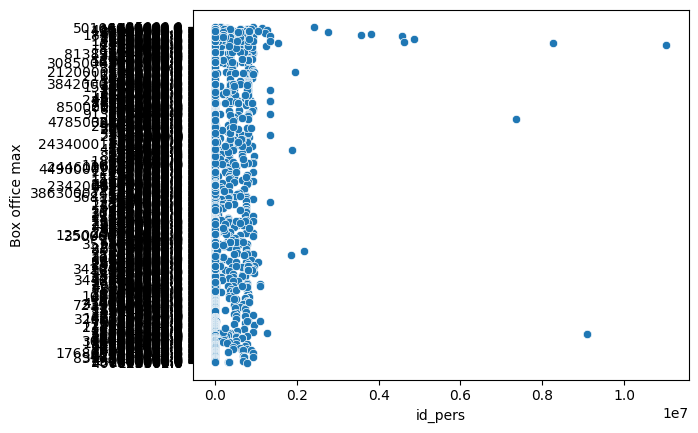

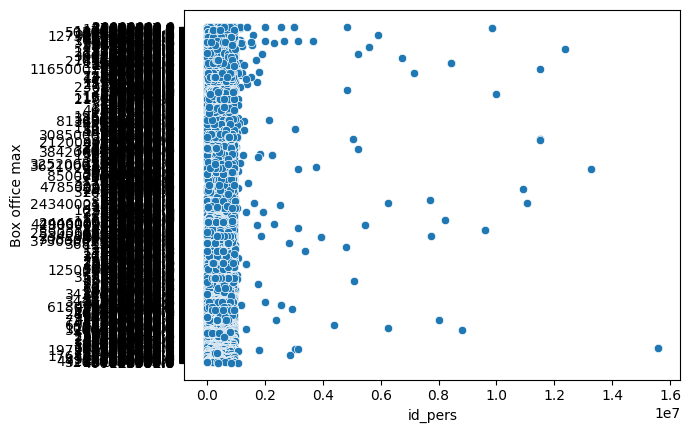

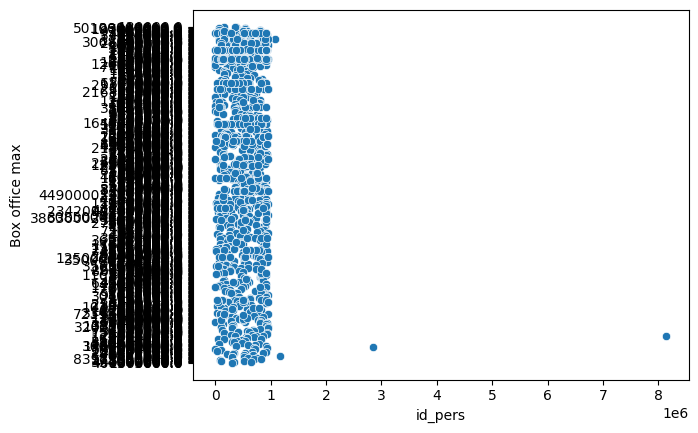

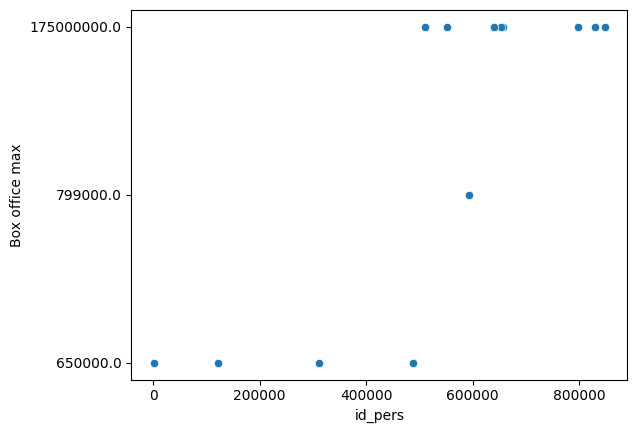

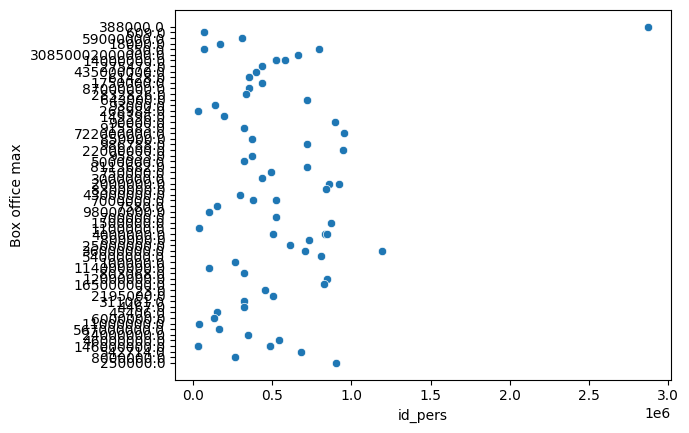

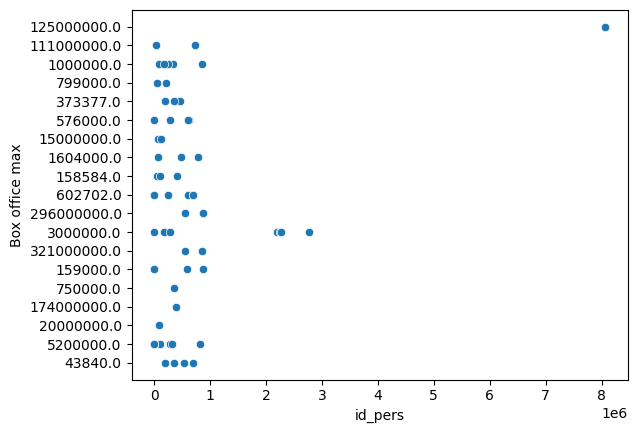

In [47]:
data_grouped = real_file.groupby("category")

for job in real_file["category"].unique():
  tmp_data = data_grouped.get_group(job)
  tmp_data = tmp_data.drop(["tconst", "nconst", "category", "category_code", "Budget min", "Budget max", "Box office min"], axis=1)
  plt.figure()
  sns.scatterplot(x=tmp_data["id_pers"], y=tmp_data["Box office max"])

# A TESTER APRES AVOIR FUSIONNER LES JOBS ET LES BOX-OFFICES DANS LE MEME DATAFRAME

Score de chaque personne en fonction de sa catégorie:

Pour chaque catégorie, pour chaque personne, il faut savoir tous ses box-offices, puis faire la moyenne de ses scores --> ordonner toutes les moyennes dans l'ordre décroissant = classement

Il faut savoir combien de personnes il y a en tout dans le classement (=normalisation) : être 50/100 n'a pas la même valeur qu'être 50/50.

In [49]:
from statistics import mean

### Classement par rapport à nconst

In [ ]:
liste_resultats = [] # grande liste qui contient tous les classements pour chaque catégorie

data_grouped = real_file.groupby("category_code")

for code in real_file["category_code"].unique(): # pour toutes les catégories, on fait le classement
  tmp_data = data_grouped.get_group(code)
  dico = dict()
  for i in range(len(tmp_data)): # Ajout dans dico, des clés (=nconst) et des scores (liste de box-office)
    if tmp_data["Box office max"].iloc[i] != "\\N": # à enlever quand le fichier ne contient aucune ligne avec \\N pour le box-office
      if tmp_data["nconst"].iloc[i] not in dico:
        dico[tmp_data["nconst"].iloc[i]] = [float(tmp_data["Box office max"].iloc[i])]
      else:
        dico[tmp_data["nconst"].iloc[i]].append(float(tmp_data["Box office max"].iloc[i]))

  for key,val in dico.items(): # Moyenne des scores pour chaque nconst s'il y en a plusieurs
    dico[key] = mean(val)

  liste_resultats.append(sorted(dico.items(), key=lambda x: x[1], reverse=True)) # classement décroissant

In [ ]:
liste_resultats

[[('nm0859180', 321000000.0),
  ('nm0544206', 321000000.0),
  ('nm0550584', 296000000.0),
  ('nm0550505', 296000000.0),
  ('nm0873428', 296000000.0),
  ('nm0873427', 296000000.0),
  ('nm0395043', 174000000.0),
  ('nm8061490', 125000000.0),
  ('nm0036280', 111000000.0),
  ('nm0730393', 111000000.0),
  ('nm0088060', 20000000.0),
  ('nm0064197', 15000000.0),
  ('nm0118353', 15000000.0),
  ('nm0820566', 5200000.0),
  ('nm0113617', 5200000.0),
  ('nm0001975', 5200000.0),
  ('nm0000009', 5200000.0),
  ('nm0285818', 5200000.0),
  ('nm0001273', 5200000.0),
  ('nm0322706', 5200000.0),
  ('nm0001294', 5200000.0),
  ('nm0000027', 5200000.0),
  ('nm0000469', 5200000.0),
  ('nm2191324', 3000000.0),
  ('nm0265923', 3000000.0),
  ('nm0184150', 3000000.0),
  ('nm2772041', 3000000.0),
  ('nm0000008', 3000000.0),
  ('nm2259003', 3000000.0),
  ('nm0291710', 3000000.0),
  ('nm2261065', 3000000.0),
  ('nm0485214', 1604000.0),
  ('nm0061504', 1604000.0),
  ('nm0779198', 1604000.0),
  ('nm0086293', 1000000.0

### Classement par rapport à id_pers

--> On n'arrive à rien interpréter ???

In [93]:
liste_resultats = [] # grande liste qui contient tous les classements pour chaque catégorie

data_grouped = real_file.groupby("category_code")

for code in real_file["category_code"].unique(): # pour toutes les catégories, on fait le classement
  tmp_data = data_grouped.get_group(code)
  dico = dict()
  for i in range(len(tmp_data)): # Ajout dans dico, des clés (=id_pers) et des scores (liste de box-office)
    if tmp_data["Box office max"].iloc[i] != "\\N": # à enlever quand le fichier ne contient aucune ligne avec \\N pour le box-office
      if tmp_data["id_pers"].iloc[i] not in dico:
        dico[tmp_data["id_pers"].iloc[i]] = [float(tmp_data["Box office max"].iloc[i])]
      else:
        dico[tmp_data["id_pers"].iloc[i]].append(float(tmp_data["Box office max"].iloc[i]))

  for key,val in dico.items(): # Moyenne des scores pour chaque nconst s'il y en a plusieurs
    dico[key] = mean(val)

  liste_resultats.append(sorted(dico.items(), key=lambda x: x[1], reverse=True)) # classement décroissant

In [94]:
liste_resultats

[[(623658, 299035432427506.44),
  (528619, 243400015000000.0),
  (84098, 108400006236333.33),
  (738746, 34538470552769.23),
  (76000, 30850002000000.0),
  (13, 30123956577739.61),
  (12, 27222937315375.0),
  (47810, 27044470649888.89),
  (562920, 16055569374611.111),
  (668510, 15425009500000.0),
  (1256, 12944451920476.111),
  (313438, 10283334846000.0),
  (141653, 7806677816666.667),
  (857187, 5855051587500.0),
  (481030, 3090513718937.0),
  (369792, 2803024990000.0),
  (807252, 2744310954428.5713),
  (394244, 2355562235285.222),
  (2, 2223688613636.364),
  (511697, 1977000000000.0),
  (550619, 1273000000000.0),
  (1105, 850019419850.0),
  (110755, 848676000000.0),
  (507849, 636500133250.0),
  (800386, 406945541691.5),
  (622980, 294006333333.3333),
  (526946, 208338610853.66666),
  (353405, 178585382295.14285),
  (688975, 83977000000.0),
  (733689, 72193000000.0),
  (320525, 72193000000.0),
  (24297, 69541000000.0),
  (205602, 69541000000.0),
  (178270, 50100000000.0),
  (879947,

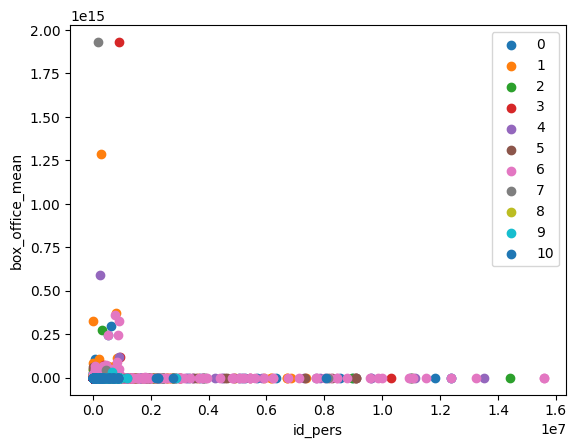

In [105]:
plt.figure()
for code in range(len(liste_resultats)): #
  plt.scatter(x=[liste_resultats[code][i][0] for i in range(len(liste_resultats[code]))], y=[liste_resultats[code][i][1] for i in range(len(liste_resultats[code]))], label=code)
plt.xlabel("id_pers")
plt.ylabel("box_office_mean")
plt.legend()
plt.show()